### <font color='darkred'>Inteligência Artificial Aplicada a Finanças</font>
### <font color='darkgreen'>Análise de Titulos Publicos ao longo do tempo </font>
### <font color='darkblue'> Suavização e Diferenciação da Série Temporal</font>

### <font color='darkred'>Instalando e Carregando os Pacotes</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
# Imports para formatação dos gráficos
from pylab import rcParams
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

platform   : 1.0.8
pandas     : 1.5.3
seaborn    : 0.12.2
numpy      : 1.23.5
statsmodels: 0.14.0
matplotlib : 3.7.1



### <font color='darkred'>Carregando o Conjunto de Dados</font>

In [5]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
# mas sem transformar o tipo para datetime
dados_serie = pd.read_csv('dados/dataset.csv', 
                          header = None, 
                          index_col = 0,
                          names = ['valor_titulo'])

In [6]:
# Série
dados_serie.head()

,valor_titulo
2004-01,112
2004-02,118
2004-03,132
2004-04,129
2004-05,121


In [7]:
dados_serie.dtypes

valor_titulo    int64
dtype: object

In [8]:
# transofarma em index mas deixa como string/object
dados_serie.index

Index(['2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
       '2004-07', '2004-08', '2004-09', '2004-10',
       ...
       '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08',
       '2015-09', '2015-10', '2015-11', '2015-12'],
      dtype='object', length=144)

Smoothing (Suavização ou Alisamento) em séries temporais é um conjunto de métodos para suavizar séries temporais eliminando "saltos". Existem várias maneiras de fazer isso. Talvez o mais fácil seja calcular a média móvel simples (Simple Moving Average).

A suavização é basicamente uma técnica usada para ver a tendência de longo prazo nos dados, diminuindo os efeitos dos componentes periódicos / sazonais dos dados. 

Basicamente, usamos suavização quando queremos remover as flutuações nos dados e focamos apenas em preservar as tendências de longo prazo.

A suavização é uma técnica aplicada às séries temporais para remover a variação granular entre as etapas do tempo. 

O objetivo de suavizar é remover o ruído e expor melhor o sinal dos processos. As médias móveis são um tipo simples e comum de suavização usado na análise de séries temporais e na previsão de séries temporais. O cálculo de uma média móvel envolve a criação de uma nova série em que os valores são compostos da média de observações brutas na série temporal original. 

A  suavização  da  média  móvel  (Moving  Average  Smoothing)  é  uma  técnica  eficaz  na previsão  de  séries  temporais  também,  ou  seja,  pode  ser  usado  para  preparação  de  dados, engenharia de recursos e até diretamente para fazer previsões.

Uma média móvel requer que você especifique um tamanho de janela chamado largura da janela. Isso define o número de observações brutas usadas para calcular o valor da média móvel. A parte "móvel" na média móvel refere-se ao fato de que a janela definida pela largura da janela é deslizada ao longo da série temporal para calcular os valores médios na nova série.

### O que é Smoothing (Suavização) em Séries Temporais?

**Smoothing** é uma técnica usada para suavizar séries temporais, removendo variações curtas e de alta frequência (saltos ou ruído), enquanto preserva a tendência de longo prazo. O objetivo é **remover as flutuações** de curto prazo, permitindo uma análise mais clara das **tendências de longo prazo** nos dados. 

A suavização é frequentemente usada como uma técnica de **pré-processamento de dados** em modelos de previsão.

### Principais Métodos de Smoothing

#### 1. Média Móvel Simples (SMA)

A **Média Móvel Simples (SMA)** calcula a média dos valores de uma série temporal dentro de uma janela deslizante de tamanho fixo. Isso suaviza os dados ao eliminar variações curtas e rápidas, mostrando as tendências subjacentes.

A fórmula para a **Média Móvel Simples** é dada por:

$$
SMA_t = \frac{1}{n} \sum_{i=t-n+1}^{t} Y_i
$$

Onde:
- \( Y_i \) é o valor da série temporal no tempo \( i \),
- \( n \) é o tamanho da janela,
- \( SMA_t \) é o valor da média móvel no tempo \( t \).

#### 2. Suavização Exponencial (Exponential Smoothing)

A **Suavização Exponencial** é uma técnica mais avançada, que dá mais peso aos valores mais recentes da série. Existem três tipos principais de suavização exponencial:

- **Suavização Exponencial Simples (SES)**: Usa um fator de suavização \(\alpha\) e é útil quando não há muita tendência ou sazonalidade nos dados. A fórmula é:

$$
S_t = \alpha Y_t + (1 - \alpha) S_{t-1}
$$

Onde:
- \( S_t \) é o valor suavizado no tempo \( t \),
- \( Y_t \) é o valor da série temporal no tempo \( t \),
- \( \alpha \) é o fator de suavização (\( 0 < \alpha < 1 \)).



- **Suavização Exponencial Dupla**: Inclui um componente para modelar tendências lineares nos dados.
- **Suavização Exponencial Tripla (Holt-Winters)**: Inclui componentes para tendências e sazonalidade, e é amplamente usada em previsões de séries temporais.

#### 3. Média Móvel Ponderada (Weighted Moving Average - WMA)

A **Média Móvel Ponderada (WMA)** é uma variação da média móvel simples, na qual diferentes pesos são atribuídos às observações dentro da janela. Os valores mais recentes recebem pesos maiores, o que significa que têm mais influência no valor suavizado.

### Aplicações da Suavização

1. **Análise de Tendências**: A suavização ajuda a expor a **tendência de longo prazo** em uma série temporal, identificando padrões gerais que podem não ser visíveis em dados brutos com variações frequentes.

2. **Previsão de Séries Temporais**: Métodos de suavização, como **médias móveis** ou **suavização exponencial**, são frequentemente usados como técnicas básicas de previsão de séries temporais.

3. **Engenharia de Features**: Na **ciência de dados**, suavização pode ser usada para criar **novas features** (características) a partir de séries temporais, removendo variações curtas e focando nas tendências principais.

### Escolha do Tamanho da Janela

A escolha do **tamanho da janela** para a média móvel é importante:
- **Janelas curtas** capturam variações rápidas, mas podem não suavizar adequadamente.
- **Janelas longas** removem flutuações curtas, mas podem perder informações importantes.

A decisão de qual tamanho de janela usar depende do tipo de série temporal e dos objetivos da análise.

### Conclusão

A **suavização** é uma técnica útil para **remover ruído** em séries temporais e expor **tendências de longo prazo**. Métodos como **média móvel simples** e **suavização exponencial** são amplamente usados na análise e previsão de séries temporais.


### <font color = darkgreen> Suavização Através da Média Móvel Simples <font>

- Calculamos a média de valores 'k' consecutivos, dependendo da frequência da série temporal.
- Aqui podemos calcular a média do último 1 ano, ou seja, os últimos 12 valores.
- Uma desvantagem dessa abordagem específica é que o período de tempo deve ser estritamente definido.

In [9]:
# Primeiro, vamos calcular a média da série (essa não é a média móvel, mas sim a média total)
dados_serie.mean()

valor_titulo    280.3125
dtype: float64

In [10]:
# Vamos criar uma cópia da série original pois isso será importante mais tarde
df_serie = dados_serie.copy()

In [11]:
# Agora definimos uma janela de 12 meses da série temporal para calcular a média móvel
# Vamos gravar o resultado em outra coluna no próprio dataset
dados_serie['valor_titulo_serie_suavizada'] = dados_serie.rolling(window = 12).mean()

In [12]:
# Imprime o dataset 
# NaN são as 12 janelas que pedimos a media, perdemos registros da série ao aplicar esta técnica de suavização.
dados_serie

,valor_titulo,valor_titulo_serie_suavizada
2004-01,112,NaN
2004-02,118,NaN
2004-03,132,NaN
2004-04,129,NaN
2004-05,121,NaN
...,...,...
2015-08,606,463.333333
2015-09,508,467.083333
2015-10,461,471.583333
2015-11,390,473.916667


In [13]:
# Primeiros 20 registros da série
dados_serie.head(20)

,valor_titulo,valor_titulo_serie_suavizada
2004-01,112,NaN
2004-02,118,NaN
2004-03,132,NaN
2004-04,129,NaN
2004-05,121,NaN
2004-06,135,NaN
2004-07,148,NaN
2004-08,148,NaN
2004-09,136,NaN
2004-10,119,NaN


In [14]:
# Últimos 20 registros da série
dados_serie.tail(20)

,valor_titulo,valor_titulo_serie_suavizada
2014-05,420,397.083333
2014-06,472,400.166667
2014-07,548,404.916667
2014-08,559,409.416667
2014-09,463,414.333333
2014-10,407,418.333333
2014-11,362,422.666667
2014-12,405,428.333333
2015-01,417,433.083333
2015-02,391,437.166667


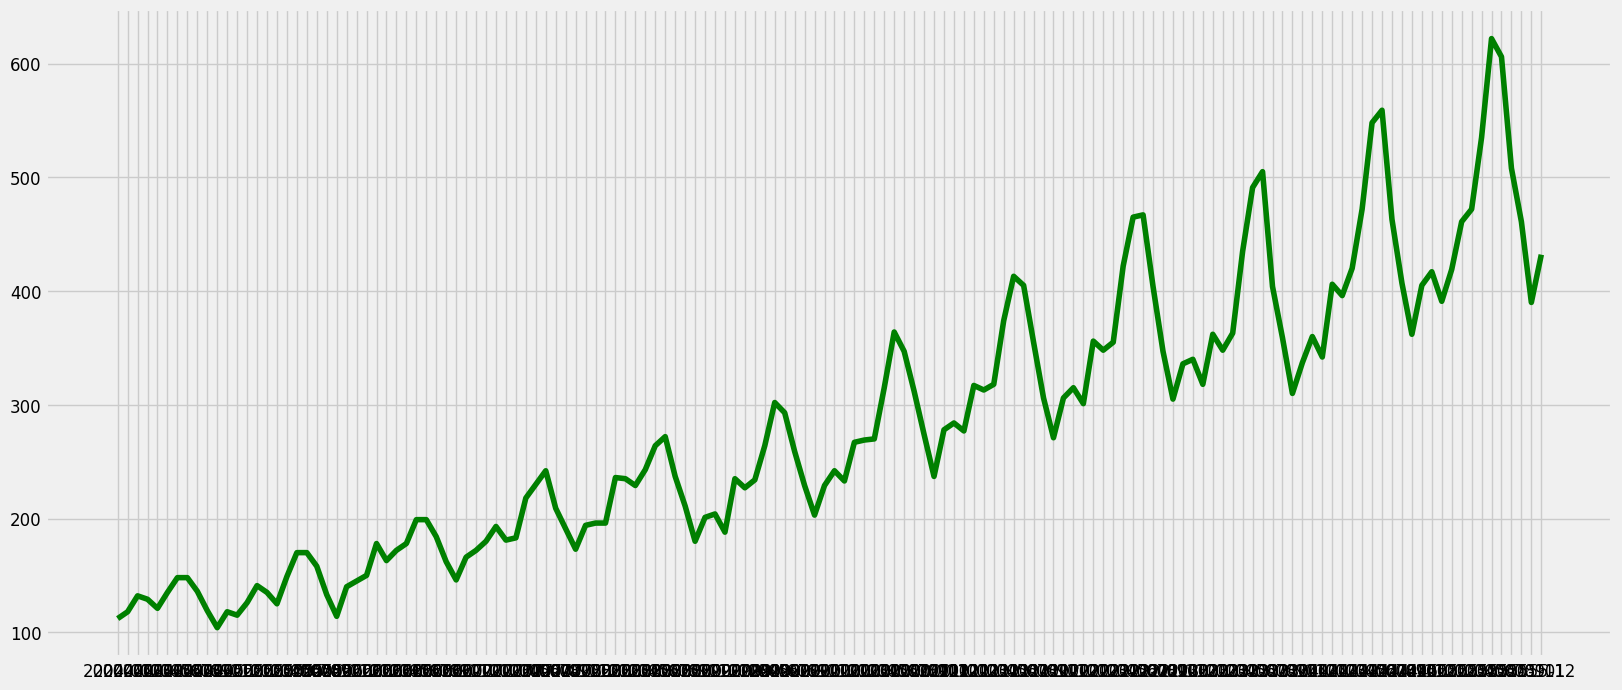

In [15]:
# Plot da série original
plt.plot(dados_serie['valor_titulo'], color = 'green')

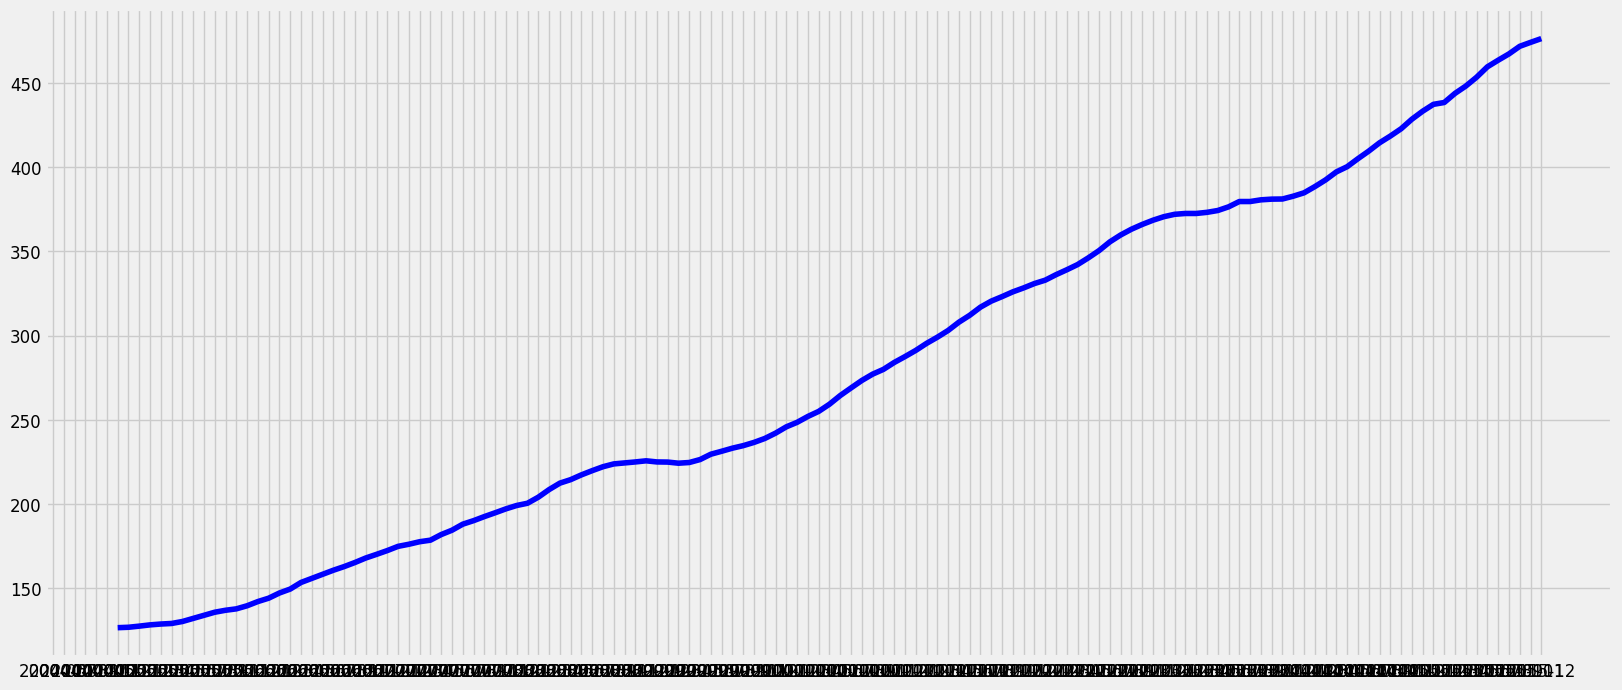

In [16]:
# Plot da série suavizada
plt.plot(dados_serie['valor_titulo_serie_suavizada'], color = 'blue')

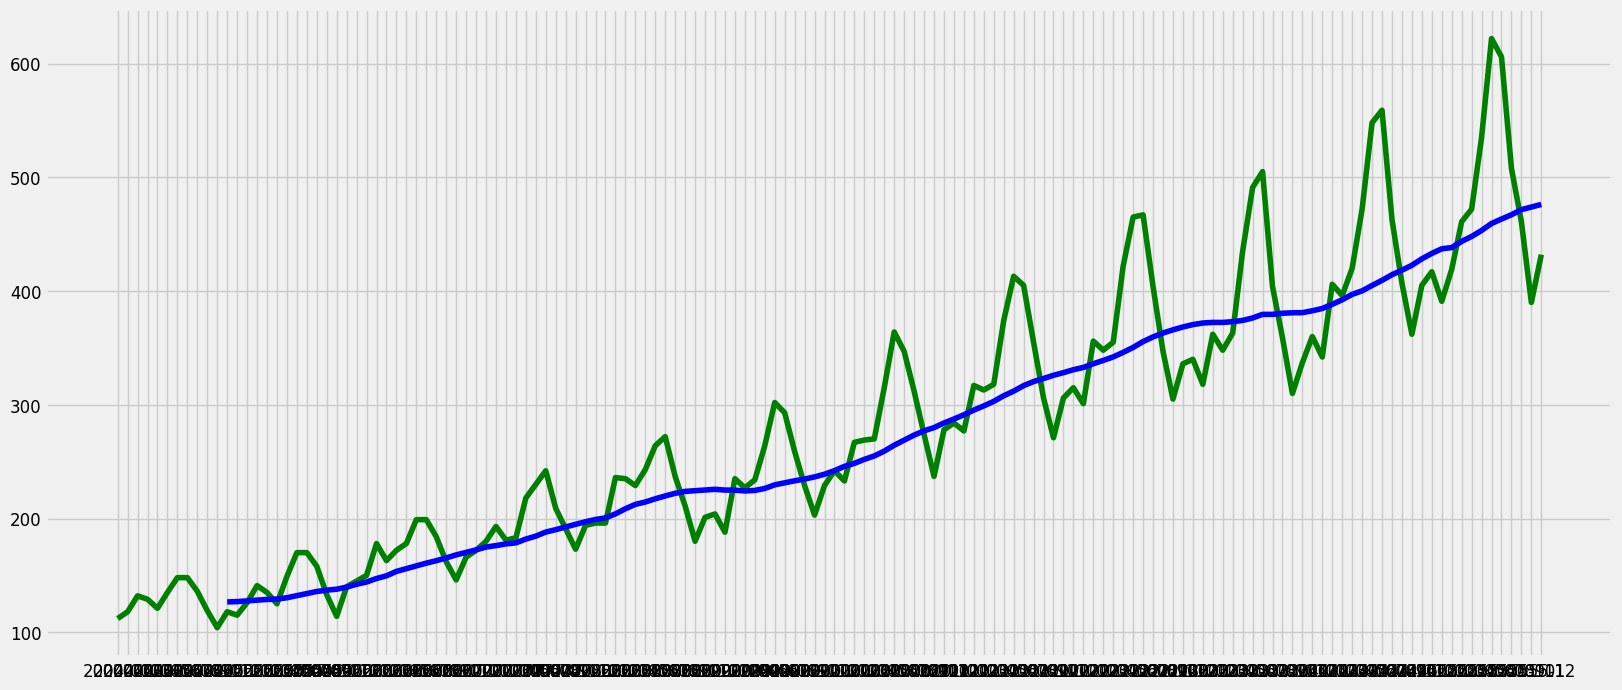

In [17]:
# Agora as duas juntas
plt.plot(dados_serie['valor_titulo'], color = 'green')
plt.plot(dados_serie['valor_titulo_serie_suavizada'], color = 'blue')

In [18]:
# Calculando a diferença entre a série original e a série suavizada
# Aqui estamos removendo a tendência da série original e deixando apenas a sazonalidade
# aqui não é a diferenciação ainda, pois não tem o shift! Estamos apenas comparando
diff_original_suavizada = dados_serie['valor_titulo'] - dados_serie['valor_titulo_serie_suavizada']
diff_original_suavizada.head(20)

2004-01          NaN
2004-02          NaN
2004-03          NaN
2004-04          NaN
2004-05          NaN
2004-06          NaN
2004-07          NaN
2004-08          NaN
2004-09          NaN
2004-10          NaN
2004-11          NaN
2004-12    -8.666667
2005-01   -11.916667
2005-02    -1.583333
2005-03    12.666667
2005-04     6.166667
2005-05    -4.166667
2005-06    18.666667
2005-07    37.833333
2005-08    36.000000
dtype: float64

In [19]:
# Vamos remover os valores NA para testar a estacionaridade
diff_original_suavizada.dropna(inplace = True)

In [20]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

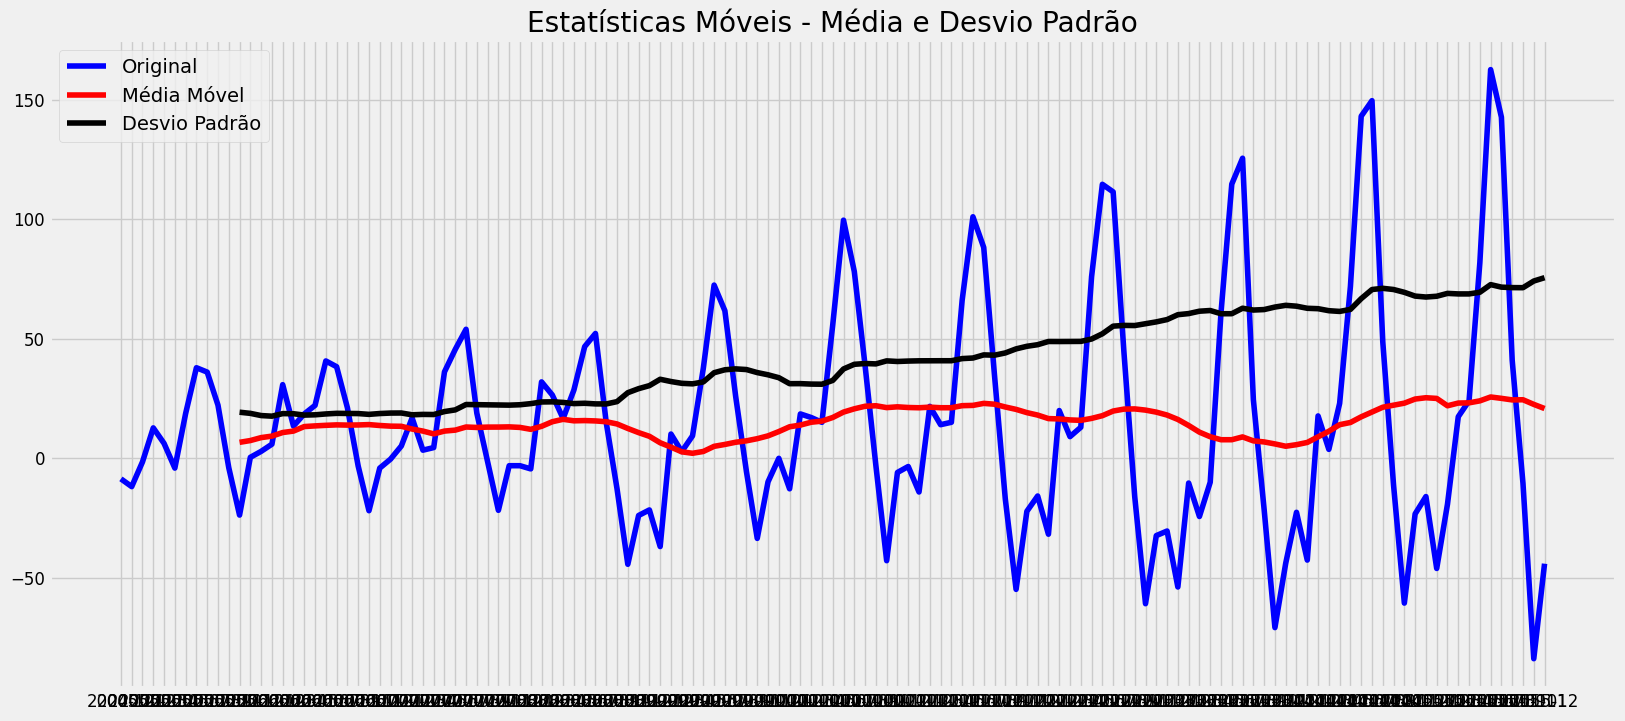


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -3.157851
Valor-p                           0.022558
Número de Lags Consideradas      13.000000
Número de Observações Usadas    119.000000
Valor Crítico (1%)               -3.486535
Valor Crítico (5%)               -2.886151
Valor Crítico (10%)              -2.579896
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [21]:
# Executando o teste de estacionaridade
testa_estacionaridade(diff_original_suavizada)

Aplicamos a suavização e extraímos a tendência da série. Esta série foi transformada e já poderíamos usá-la para construir um modelo preditivo. Mas temos um problema. Perdemos uma parte dos dados, parte essa que poderia ser importante para prever o comportamento futuro.

Vamos testar outras técnicas e verificar se temos sucesso sem perder tantos dados.

### Suavização Através da Média Móvel Ponderada Exponencial

- Para superar o problema de escolher uma janela definida na média móvel, podemos usar a média móvel ponderada exponencial.
- Adotamos uma "média móvel ponderada", em que valores mais recentes recebem um peso maior.
- Pode haver muitas técnicas para atribuir pesos. Uma popular é a média móvel ponderada exponencialmente em que os pesos são atribuídos a todos os valores anteriores com um fator de redução.

A função ewm() do Pandas permite aplicar esse método com facilidade. exponencial weighted mean - ewm

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

In [22]:
# Aplicando suavização exponencial
# Observe que estamos aplicando a suavização à série original (antes de aplicar a suavização anterior)
serie_suavizada_exp = df_serie.ewm(alpha = 0.2, adjust = True).mean()

In [23]:
serie_suavizada_exp

,valor_titulo
2004-01,112.000000
2004-02,115.333333
2004-03,122.163934
2004-04,124.479675
2004-05,123.444550
...,...
2015-08,512.214093
2015-09,511.371274
2015-10,501.297019
2015-11,479.037615


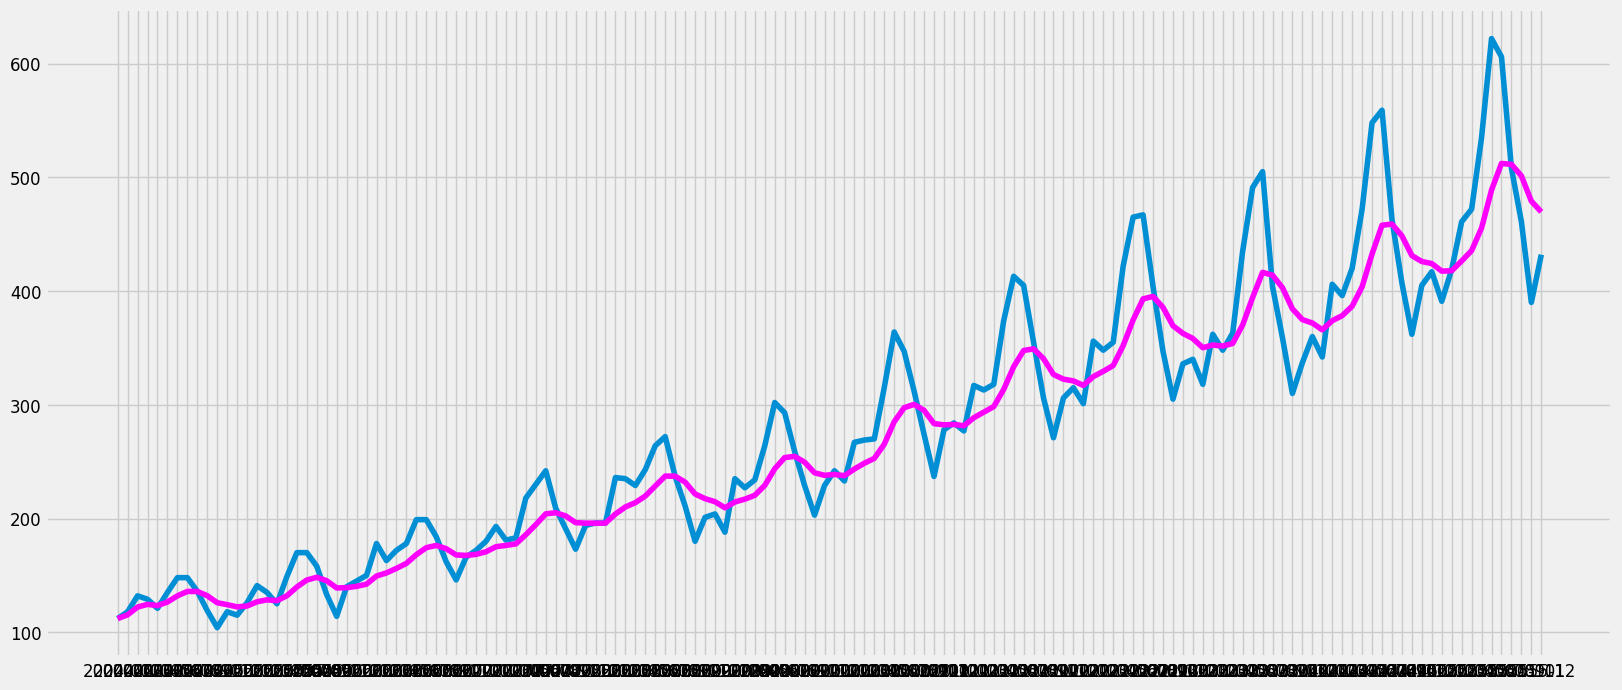

In [24]:
# Plt das séries
plt.plot(df_serie)
plt.plot(serie_suavizada_exp, color = 'magenta')

Suavização aplicada. Vamos agora calcular a diferença e aplicar o teste de estacionaridade.

In [25]:
# Diferença
diff_original_suav_exp = df_serie.valor_titulo - serie_suavizada_exp.valor_titulo

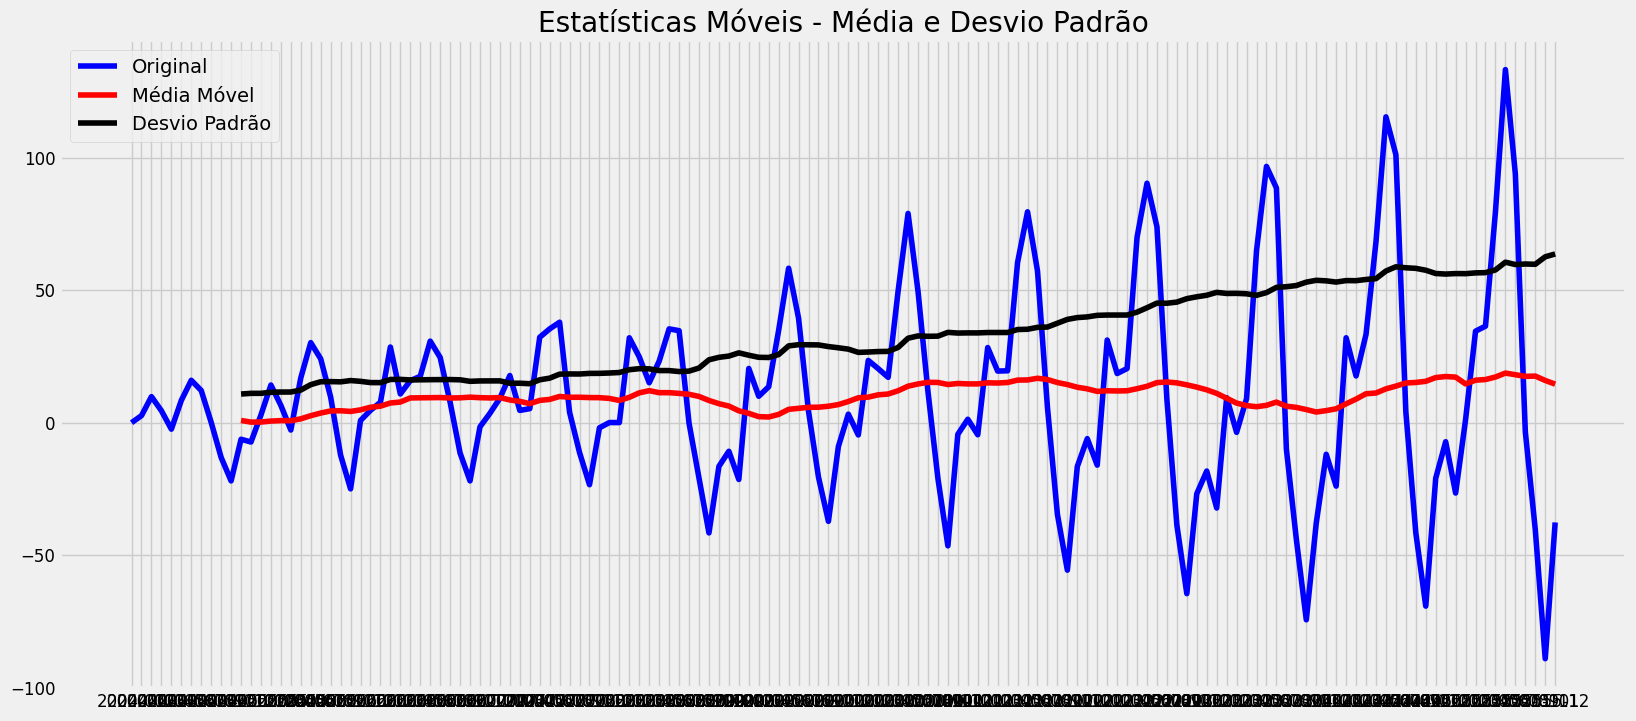


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.795521
Valor-p                           0.058916
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [26]:
# Executando o teste de estacionaridade
testa_estacionaridade(diff_original_suav_exp)

Perceba que a Suavização Exponencial não foi suficiente para deixar a série estacionária.

**Com a suavização podemos transformar nossa série em estacionária. Mas essas técnicas simples de suavização não funcionam em todos os casos, principalmente nos de alta sazonalidade. E para esses casos precisamos da Diferenciação

## <font color='darkgreen'> Diferenciação </font>

- As tendências podem resultar em uma média variável ao longo do tempo, enquanto a sazonalidade pode resultar em muita variância ao longo do tempo, ambas as quais definem uma série temporal como não estacionária.

- A diferenciação funciona subtraindo o valor anterior de cada ponto na série, removendo, assim, a tendência de longo prazo e transformando muitas séries não estacionárias em estacionárias.

**Diferenciação nem sempre resolve o problema completamente**

- Em muitos casos, uma simples diferenciação (primeira ordem) pode ser suficiente para remover tendências de uma série, tornando-a estacionária. No entanto, séries com sazonalidade complexa ou componentes cíclicos podem exigir diferenciação sazonal ou até múltiplas diferenciações.


- Mesmo com a diferenciação, pode haver resíduos autocorrelacionados, indicando que outros componentes precisam ser modelados, como a sazonalidade ou uma tendência de longo prazo mais complexa.

**A Importância de Conhecer Outras Técnicas:**

- Médias móveis, suavizações e transformações como logaritmo ou Box-Cox ajudam a transformar séries de diferentes maneiras antes de aplicar a diferenciação. Elas podem reduzir a variância, remover ruídos ou assimetrias que a diferenciação, sozinha, não resolve.


- A análise de tendência e sazonalidade é essencial antes de aplicar qualquer técnica, incluindo a diferenciação. Você precisa entender bem os padrões dos dados para aplicar a técnica correta. Por exemplo, se houver forte sazonalidade, pode ser mais eficaz aplicar diferenciação sazonal.


- É importante aplicar a diferenciação como parte de um processo de diagnóstico completo, junto com outros métodos como o teste de Dickey-Fuller, análise de ACF e PACF, e verificar se a série diferenciada já não exibe mais autocorrelação significativa.

In [27]:
# Carrega os dados
dados_serie = pd.read_csv('dados/dataset.csv', 
                          header = None)

In [28]:
# Série
dados_serie.head()

,0,1
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [29]:
# Ajusta o nome das colunas
dados_serie.columns = ['data', 'valor_titulo']

In [30]:
# Série
dados_serie.head()

,data,valor_titulo
0,2004-01,112
1,2004-02,118
2,2004-03,132
3,2004-04,129
4,2004-05,121


In [31]:
# Converte a data no formato apropriado
dados_serie['data'] = pd.to_datetime(dados_serie['data'], format = '%Y-%m')

In [32]:
# Série
dados_serie.head()

,data,valor_titulo
0,2004-01-01,112
1,2004-02-01,118
2,2004-03-01,132
3,2004-04-01,129
4,2004-05-01,121


In [33]:
# Define a data como índice da série
dados_serie = dados_serie.set_index('data')

In [34]:
# Série
dados_serie.head()

,valor_titulo
data,
2004-01-01,112
2004-02-01,118
2004-03-01,132
2004-04-01,129
2004-05-01,121


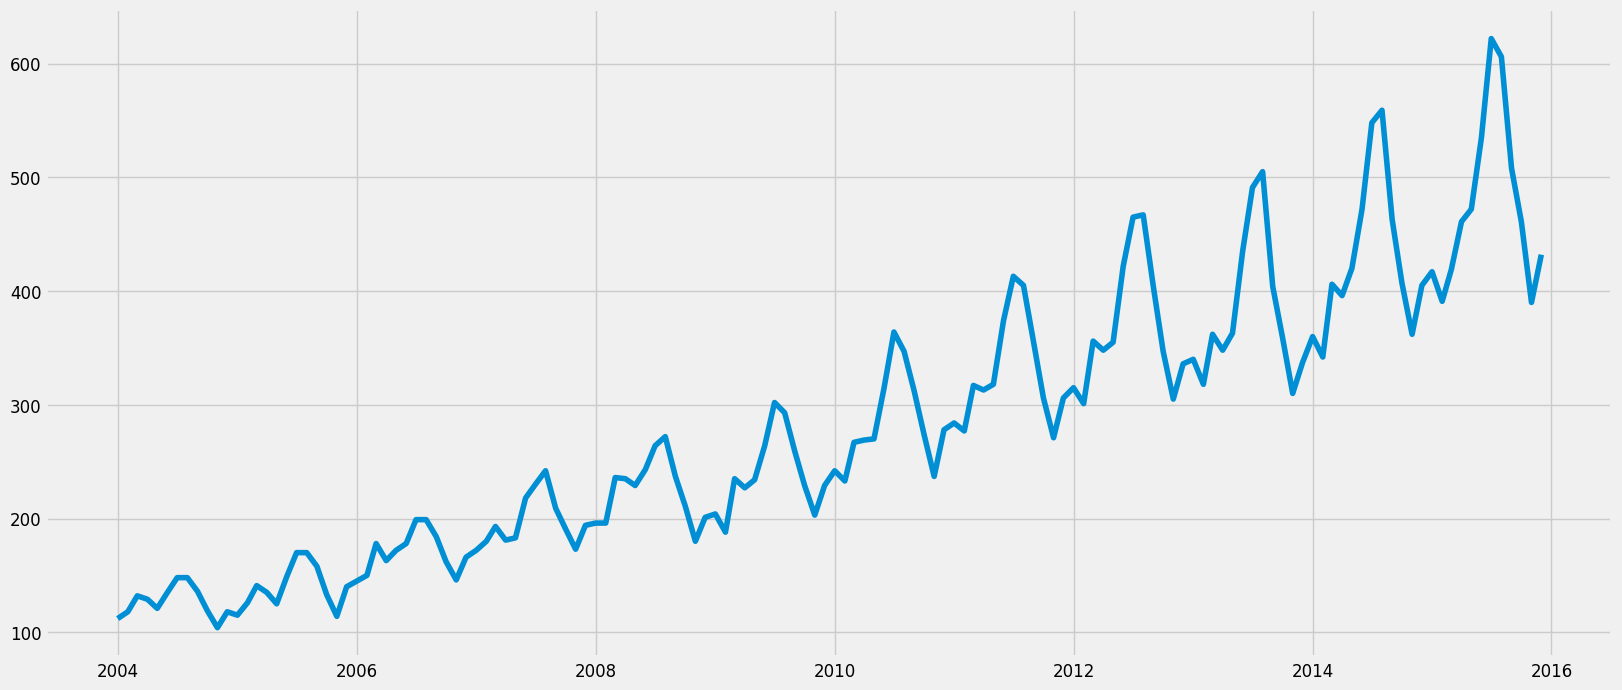

In [35]:
# Plot
plt.plot(dados_serie)

In [36]:
# Função para testar a estacionaridade - com a série de volta ao ponto inicial
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

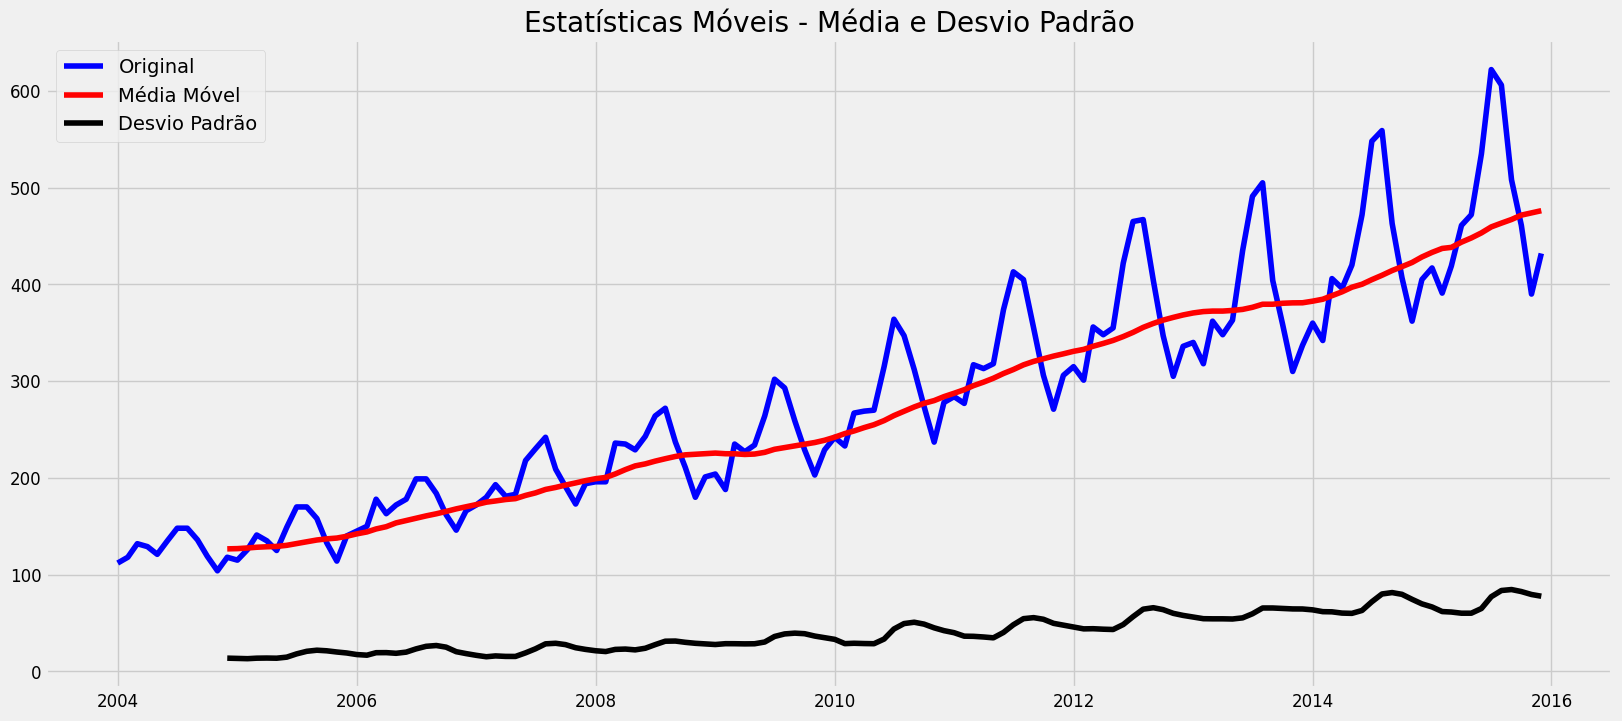


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.817848
Valor-p                           0.991919
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [37]:
# Vamos testar a estacionaridade da série antes de qualquer transformação
testa_estacionaridade(dados_serie)

A série claramente não é estacionária. Média e variância (nesse caso desvio padrão, que é raiz quadrada da variância) variam ao longo do tempo. 

### <font color = darkgreen> Diferenciação Para Remover Tendência </font>

Na Diferenciação tomamos a diferença da observação em um determinado instante com a  do  instante  anterior.  
A  diferenciação  é  realizada  subtraindo  a  observação  anterior  da observação atual:

> **difference(t) = observation(t) - observation(t-1)**


A  inversão  do  processo  é  necessária  quando  uma  previsão  deve  ser  convertida novamente na escala original. Este processo pode ser revertido adicionando a observação no passo anterior ao valor da diferença.

> **inverted(t) = differenced(t) + observation(t-1)**

Alguma  estrutura  temporal  ainda  pode  existir  após  a  execução  de  uma  operação  de diferenciação, como no caso de uma tendência não linear.Como tal, o processo de diferenciação pode ser repetido mais de uma vez até que toda a dependência temporal seja removida.

**Vamos primeiro colocar os dados na mesma escala com a transformação de log e em seguida aplicar a diferenciação.**

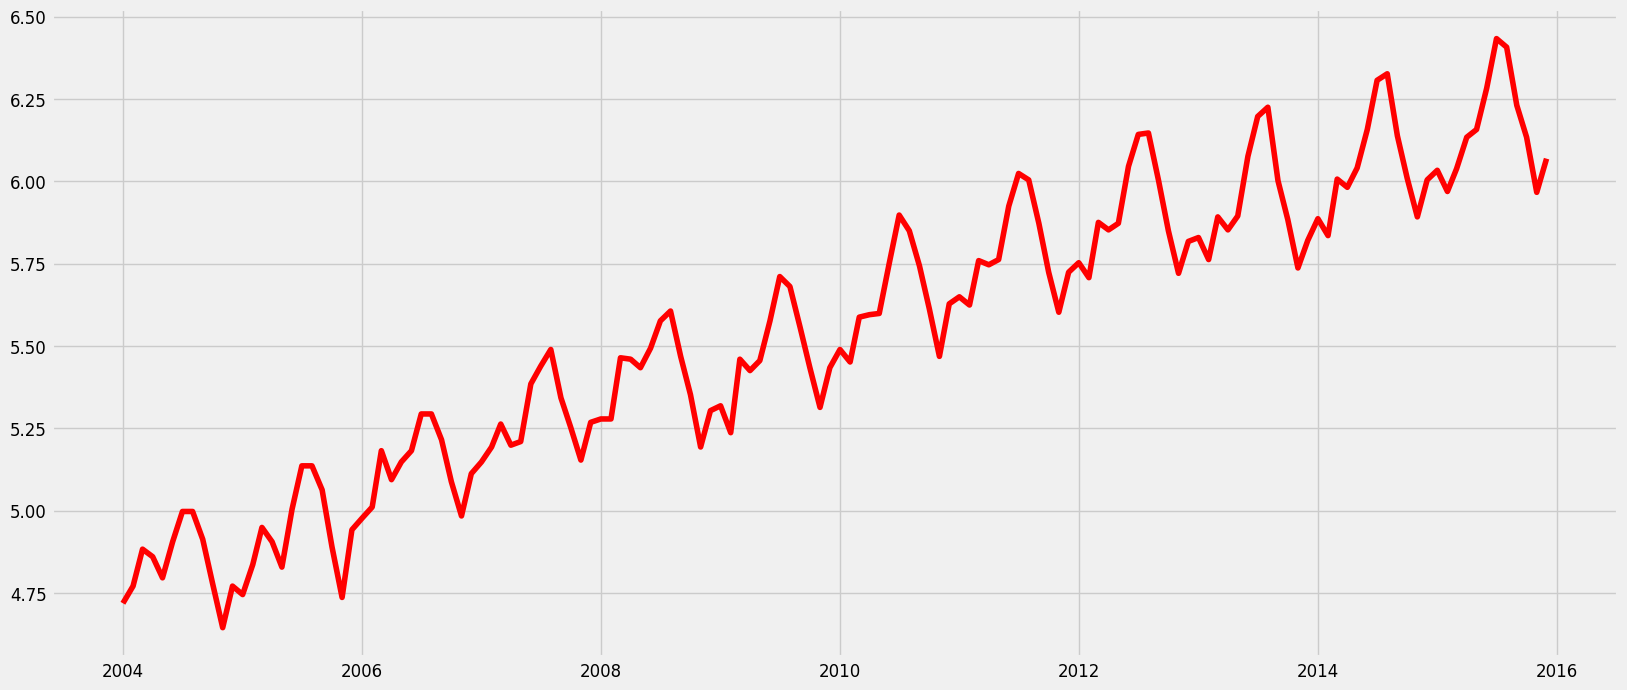

In [38]:
# Transformação de log
# Precisa deixar todos os valores na mesma escala e consequentemente valores menores, simplifca os dados!
dados_serie_log = np.log(dados_serie)
plt.plot(dados_serie_log, color = "red")

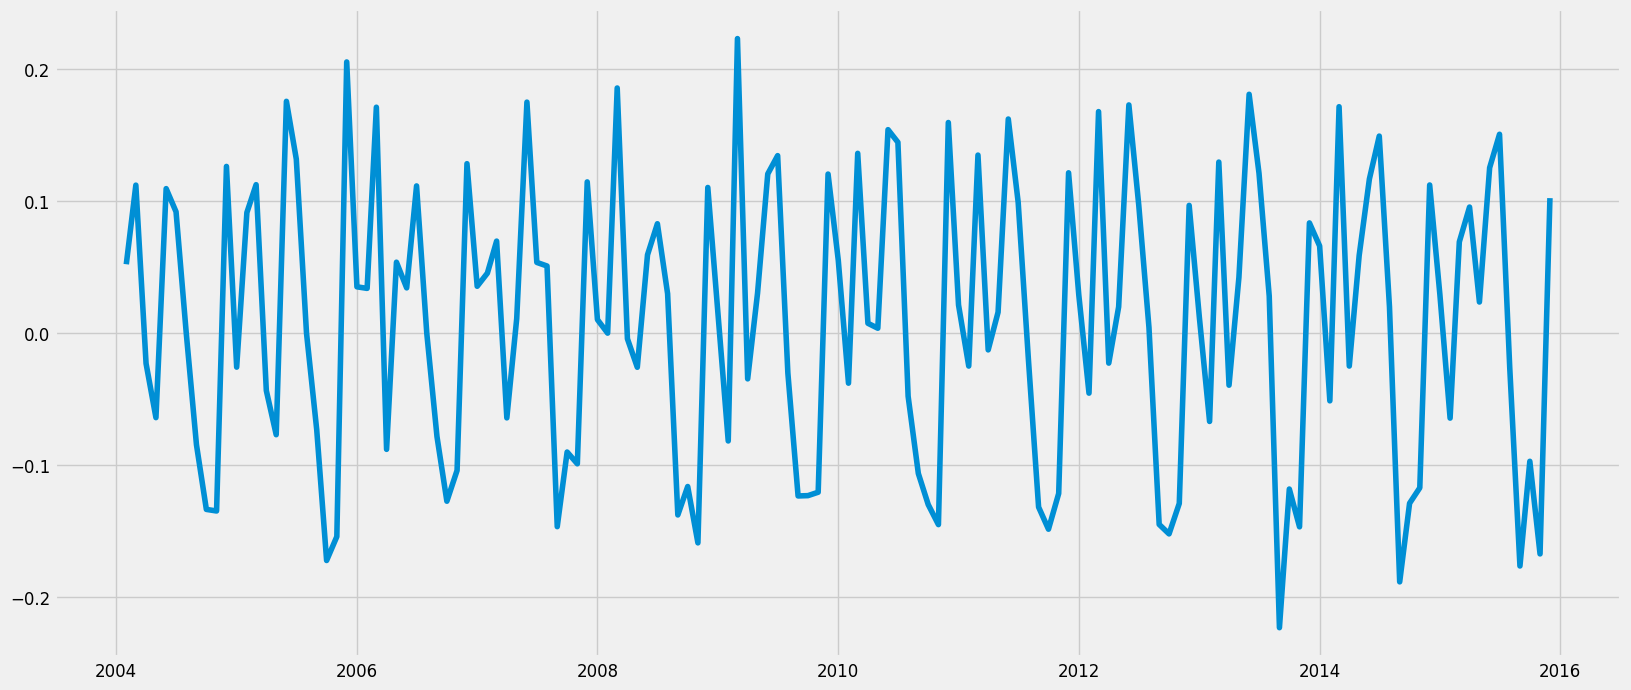

In [39]:
# 1ª Diferenciação Para Remover Tendência Linear - Exemplo 1
# O método shift() move os dados em uma unidade
# Observe que estamos usando a série com transformação de log já aplicada
dados_serie_diff1 = dados_serie_log.valor_titulo - dados_serie_log.valor_titulo.shift() # como padrão (1)
plt.plot(dados_serie_diff1)

In [40]:
# Você pode criar sua função para diferenciação, se desejar: customizar a diferenciação
# como vantagem temos mais controle da diferneciação, podemos modificar por ex:
# colocando uma cte, modificiando o shift ou salto
def diffFunc(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

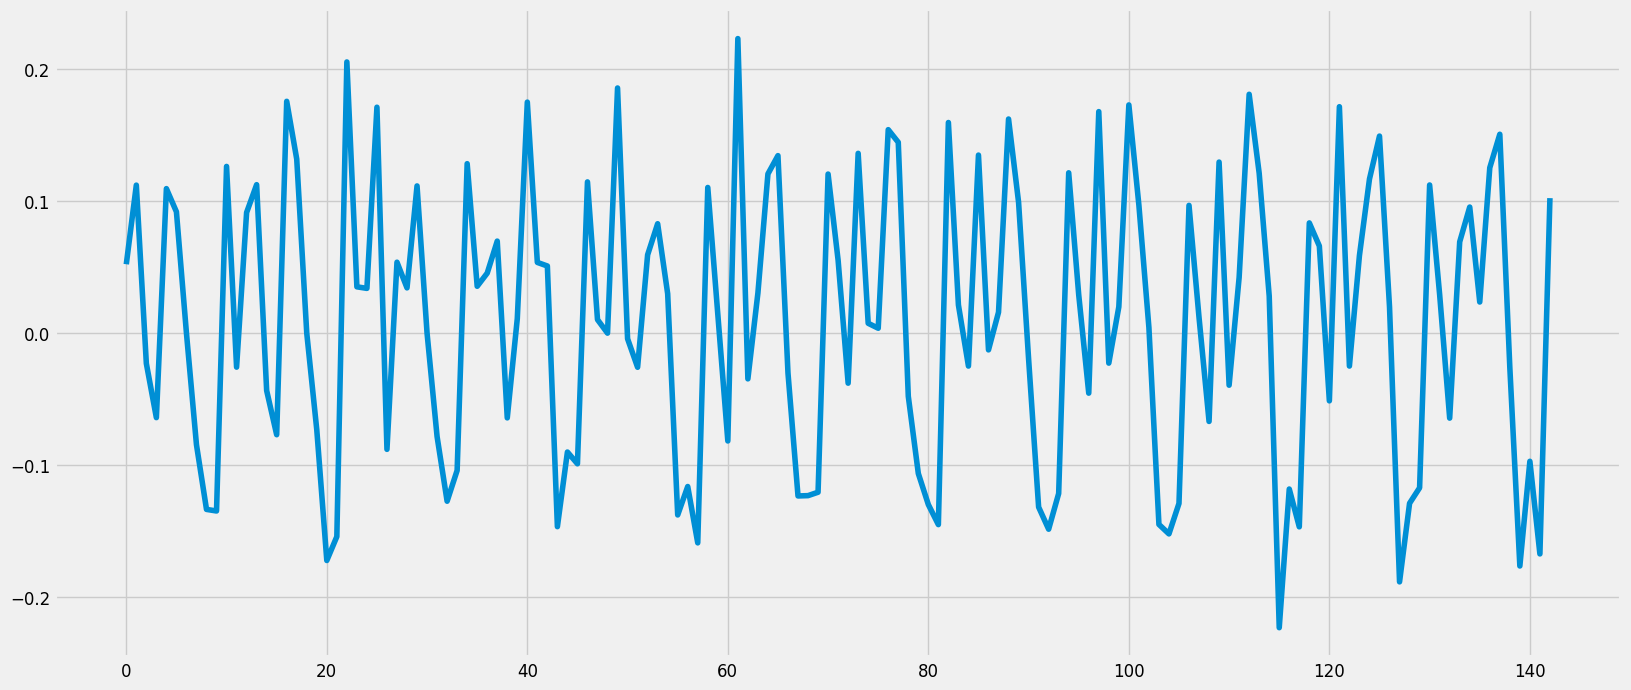

In [41]:
# Diferenciação Para Remover Tendência - Exemplo 2
# Observe que estamos usando a série com transformação de log
# ele cria como resultado uma lista, precisa converter pra dataframe do pandas pra aplicar o teste de estacionaridade
dados_serie_diff2 = diffFunc(dados_serie_log['valor_titulo'])
plt.plot(dados_serie_diff2)

In [42]:
# Converte em dataframe, a lista gerada ao aplicar a diferenciação
dados_serie_diff2_df = pd.DataFrame(dados_serie_diff2) 

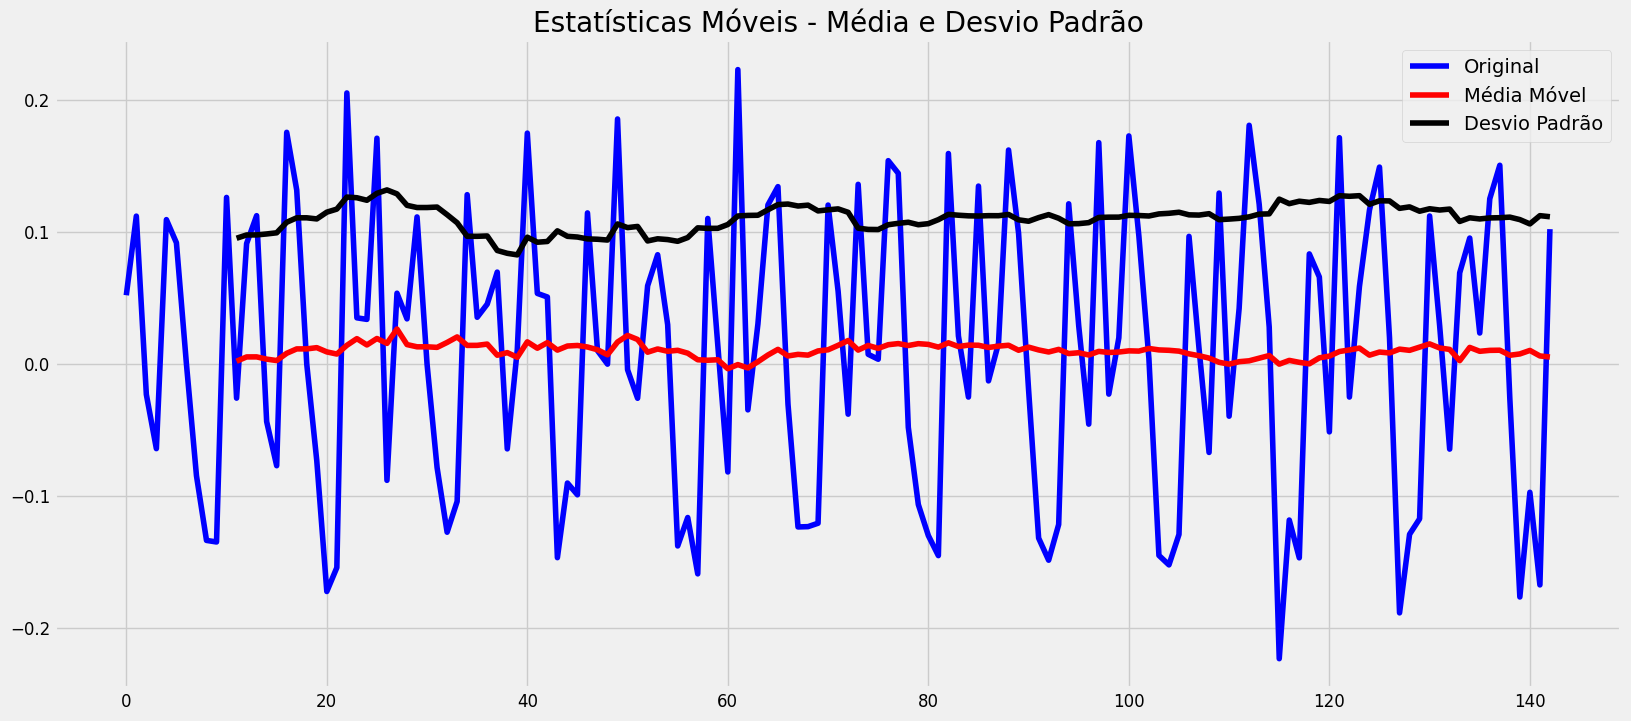


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -2.715922
Valor-p                           0.071323
Número de Lags Consideradas      14.000000
Número de Observações Usadas    128.000000
Valor Crítico (1%)               -3.482501
Valor Crítico (5%)               -2.884398
Valor Crítico (10%)              -2.578960
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [43]:
# Vamos testar a estacionaridade da série após a diferenciação para remover a tendência
# Como os 2 exemplos anteriores geram o mesmo resultado, vamos usar o segundo
# coloca como argumenta o dataset gerado na função que ja foi carregada acima!
testa_estacionaridade(dados_serie_diff2_df)

O valor-p reduziu bastante e está quase próximo do limite e média e variância estão quase constantes. Talvez remover somente a tendência ou somente a sazonalidade não seja suficiente. Temos na verdade que remover ambos. Vamos fazer isso agora.

### <font color = darkgreen> Diferenciação Para Remover Sazonalidade </font>

1. Diferenciação de Primeira Ordem (1ª diferenciação)

**Objetivo: Remover a tendência linear.**

Quando aplicamos a primeira diferenciação em uma série temporal, estamos subtraindo o valor anterior do valor atual, ou seja:

$$
Y'_t = Y_t - Y_{t-1}
$$
 
Isso remove a tendência de longo prazo que está presente nos dados, transformando uma série com tendência crescente ou decrescente em uma série mais estável e, potencialmente, estacionária.
Se a série tiver uma tendência linear, uma única diferenciação normalmente é suficiente para remover essa tendência.


2. Diferenciação de Segunda Ordem (2ª diferenciação)

**Objetivo: Remover componentes de tendência mais complexos ou resquícios de tendência após a primeira diferenciação.**

A segunda diferenciação é, basicamente, a diferenciação dos valores já diferenciados:

$$
Y''_t = Y'_t - Y'_{t-1}
$$


É útil quando a tendência original não é completamente linear ou quando restam variações mais sutis (como uma curva quadrática ou componentes de segunda ordem) após a primeira diferenciação.
A segunda diferenciação, no entanto, não remove automaticamente a sazonalidade. Ela é usada principalmente para eliminar tendências mais persistentes ou complexas.


3. Diferenciação Sazonal:

**Objetivo: Remover componentes sazonais (padrões repetitivos em intervalos regulares).**

Se houver sazonalidade (por exemplo, padrões mensais ou trimestrais), a simples diferenciação de primeira ou segunda ordem pode não ser suficiente. Nesse caso, usamos uma diferenciação sazonal, que subtrai os valores correspondentes a um período sazonal (por exemplo, o valor de 12 meses atrás em dados mensais):

$$
Y'_t = Y_t - Y_{t-s}
$$

 
Onde s é o período sazonal. Por exemplo, se você está analisando dados mensais e há um padrão sazonal anual, você faria:

$$
Y'_t = Y_t - Y_{t-12}
$$
 
Isso remove o componente sazonal, ou seja, padrões repetitivos em intervalos fixos de tempo.
Resumo:
1ª diferenciação: Remove a tendência linear.
2ª diferenciação: Remove tendências não lineares ou resquícios de tendência após a primeira diferenciação, mas não remove sazonalidade.
Diferenciação sazonal: Remove padrões sazonais, repetitivos, em intervalos regulares (como meses ou trimestres).


Em muitos casos, aplicar uma diferenciação sazonal pode ser necessário em conjunto com a primeira ou segunda diferenciação para lidar com séries que possuem tanto tendência quanto sazonalidade. Portanto, a segunda diferenciação não remove diretamente a sazonalidade; para isso, a diferenciação sazonal é a abordagem mais indicada.

### <font color = darkgreen> Diferenciação Para Remover Sazonalidade </font>


Variação sazonal, ou sazonalidade, são ciclos que se repetem regularmente ao longo do tempo.Um padrão de repetição dentro de cada ano é conhecido como variação sazonal, embora o termo seja aplicado de maneira mais geral a padrões repetidos em qualquer período fixo

O exemplo abaixo aplica a função diffFunc() à última versão da nossa série até aqui, com transformacão de log e diferenciação para remover tendência. 

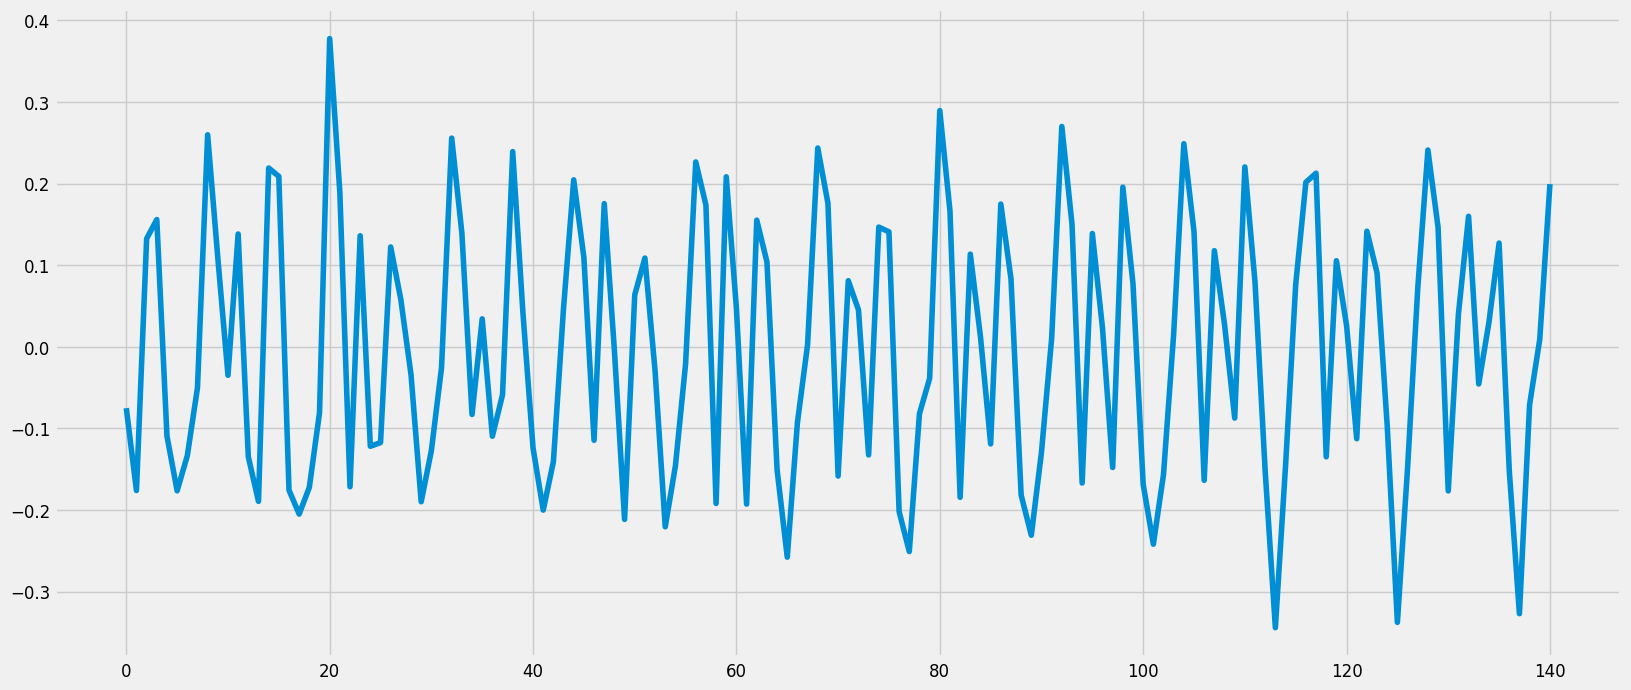

In [44]:
# Diferenciação para remover sazonalidade
# Observe o valor 2. Representa o intervalo para calcular a diferenciação. 
# Colocamos o valor 2 apenas para mostrar que é possível, mas se usarmos o valor 1 como usamos na 
# primeira diferenciação, o resultado é tão bom quanto.
# Se fosse uma diferenciação sazonal, o valor do segundo argumento seria o período sazonal, 
# como 12 para uma série mensal com sazonalidade anual.

dados_serie_diff3 = diffFunc(dados_serie_diff2, 2)
plt.plot(dados_serie_diff3)

In [45]:
# Converte em dataframe a lista gerada ao aplicar a diferenciação
dados_serie_final = pd.DataFrame(dados_serie_diff3) 

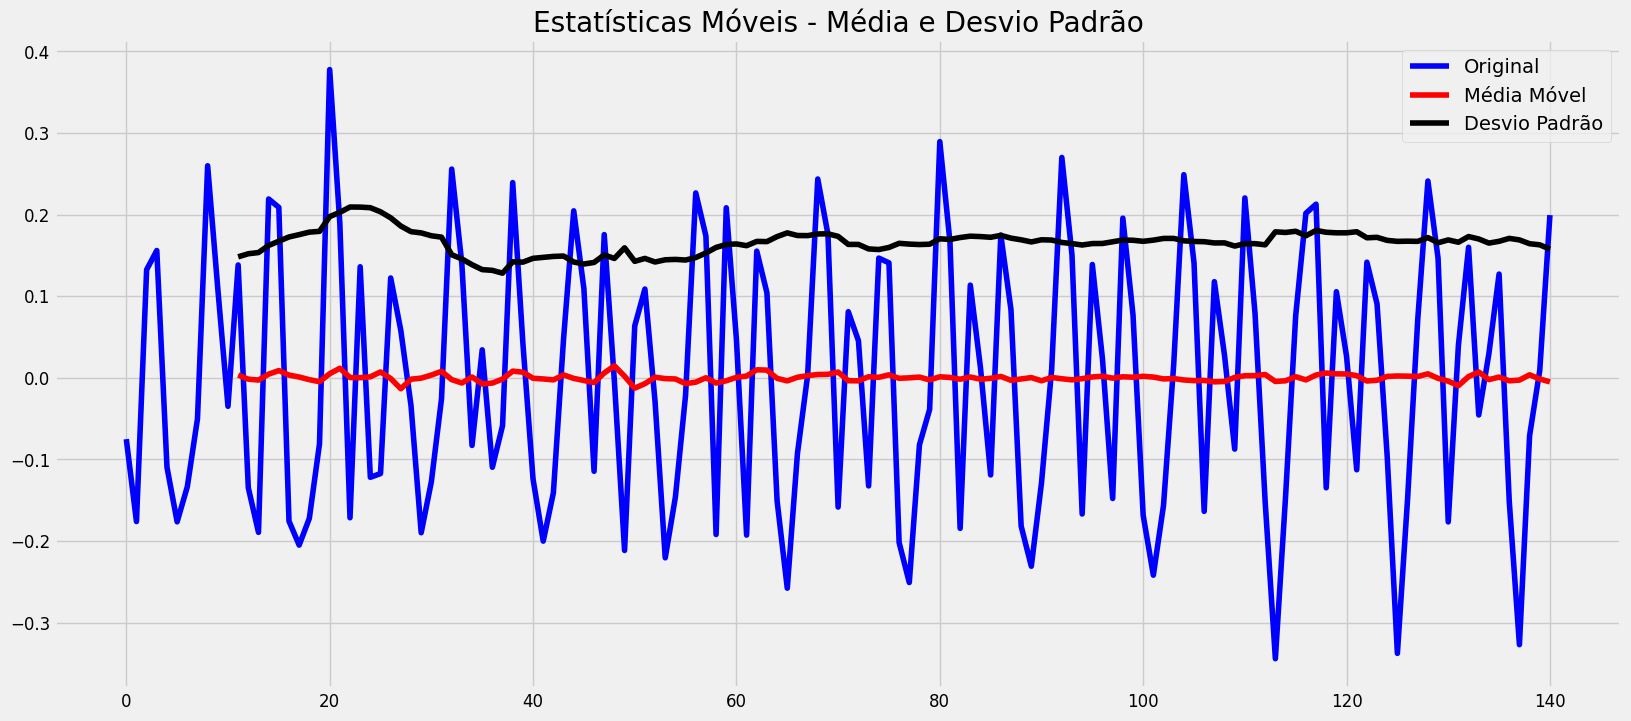


Resultado do Teste Dickey-Fuller:

Estatística do Teste           -1.481930e+01
Valor-p                         1.974942e-27
Número de Lags Consideradas     1.000000e+01
Número de Observações Usadas    1.300000e+02
Valor Crítico (1%)             -3.481682e+00
Valor Crítico (5%)             -2.884042e+00
Valor Crítico (10%)            -2.578770e+00
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [46]:
# Testa a estacionaridade
testa_estacionaridade(dados_serie_final)

Nossa série agora é estacionária e já podemos usá-la para construir modelos preditivos. Observe que as estatísticas agora são constantes e não variam mais com o tempo.

Ou seja, transformamos os dados, mas sem perder a informação, como aconteceu na técnica de suavização, a fim de observar a tendência da série por outro ângulo e agora poder realizar previsões verdadeiramente válidas e profissionais. **Se usássemos a série no formato original, faríamos previsões incorretas.**

Cada uma das técnicas mostradas aqui tem pontos positivos e negativos e serão mais ou menos eficientes dependendo dos dados.

## Teoria:

Embora a segunda diferenciação seja eficaz para lidar com muitas séries temporais, há situações em que ela não resolve o problema de estacionaridade ou não é suficiente. 

Isso acontece porque a segunda diferenciação lida basicamente com tendências mais complexas e componentes cíclicos, mas não aborda todos os tipos de padrões que podem aparecer em séries temporais. Aqui estão alguns exemplos:

> **1. Sazonalidade Complexa ou Irregular**

Se a série temporal tem uma sazonalidade não fixa ou não linear, a simples aplicação de uma diferenciação sazonal ou de segunda ordem pode não ser suficiente.

Por exemplo, séries temporais com sazonalidade complexa ou em que o padrão sazonal muda ao longo do tempo (como padrões sazonais que se intensificam ou enfraquecem) requerem técnicas mais sofisticadas para capturar a sazonalidade de maneira precisa.
Solução alternativa: Modelos como o SARIMA (ARIMA sazonal), que combina diferenciação e modelagem específica para sazonalidade, podem ser necessários para lidar com esses padrões sazonais complexos.


> **2. Componentes Não Lineares ou Estruturais**

Algumas séries temporais podem conter componentes não lineares que não são removidos apenas com diferenciação. Um exemplo disso seriam séries com quebras estruturais, onde o comportamento da série muda drasticamente em determinados pontos no tempo (por exemplo, mudanças nas políticas econômicas ou eventos extremos como crises financeiras).
Solução alternativa: Modelos que lidam com mudanças de regime, como o Modelo de Mudança de Regime de Markov ou técnicas que identificam e tratam quebras estruturais, podem ser mais adequados. Ferramentas como o teste de Chow podem ser usadas para detectar essas mudanças.


> **3. Tendências Não Estacionárias de Longo Prazo (Comportamento de Raiz Unitária)**

Algumas séries temporais podem ter tendências que seguem um comportamento de raiz unitária, ou seja, um comportamento não estacionário que não é removido por diferenciação simples. Isso ocorre, por exemplo, em séries financeiras onde há um efeito de random walk (caminho aleatório).
Solução alternativa: O uso de modelos cointegrados, como o Modelo de Vetores Autorregressivos com Correção de Erro (VECM), pode ser mais adequado quando há relações de longo prazo entre variáveis que se movem juntas ao longo do tempo.


> **4. Ciclos Longos ou Flutuações de Baixa Frequência**

Ciclos de longo prazo, como ciclos econômicos (que podem durar vários anos), podem não ser completamente eliminados por uma segunda diferenciação. Isso porque a diferenciação geralmente lida com tendências mais curtas e padrões sazonais repetitivos.
Solução alternativa: Técnicas de decomposição de séries temporais, como a Decomposição STL (Seasonal-Trend decomposition using Loess), ou técnicas de alisamento de baixa frequência, como o Filtro de Hodrick-Prescott, são mais adequadas para extrair esses ciclos de longo prazo.


> **5. Flutuações de Alta Frequência ou Ruído Branco**

Se a série contiver muitos componentes de ruído branco (flutuações aleatórias que não seguem um padrão específico), a diferenciação não ajudará a resolver isso, pois o ruído branco já é estacionário, mas não previsível. A diferenciação pode amplificar o ruído.
Solução alternativa: O uso de técnicas de suavização ou filtros de alisamento (como o filtro de Kalman ou médias móveis exponenciais) pode ajudar a remover o ruído e tornar a série mais interpretável.


> **6. Séries Multivariadas e Cointegração**

Em séries temporais multivariadas, onde diferentes séries têm relações de longo prazo, a simples diferenciação pode perder informações sobre as relações entre as variáveis. Isso é importante em casos de cointegração, onde as séries individuais podem ser não estacionárias, mas suas combinações lineares são estacionárias.
Solução alternativa: O modelo VECM é usado nesses casos para manter as relações de longo prazo entre as variáveis, preservando a cointegração enquanto remove a não estacionaridade.


> **Resumo:**
A segunda diferenciação lida principalmente com a tendência de segunda ordem e componentes cíclicos, mas pode falhar em lidar com:

- Sazonalidade complexa ou irregular.
- Mudanças estruturais ou quebras na série.
- Componentes de longo prazo, como cointegração ou ciclos econômicos longos.
- Ruído branco ou flutuações aleatórias de alta frequência.


Portanto, embora a diferenciação seja uma ferramenta valiosa, há muitos casos em que outras técnicas (como decomposição, modelos sazonais específicos ou cointegração) são necessárias para capturar a complexidade da série temporal.